<a href="https://colab.research.google.com/github/JVMergulho/foto_comp/blob/main/tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install opencv-python

In [50]:
!git clone https://github.com/JVMergulho/foto_comp

Cloning into 'foto_comp'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 22 (delta 3), reused 6 (delta 1), pack-reused 0
Receiving objects: 100% (22/22), 2.49 MiB | 7.08 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

In [3]:
def read_rgb(img_path):
  img = cv2.imread(img_path)
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Segmentação de cor e conversão para escala de cinza

In [25]:
def color_segmentation(orig, dist, img):
  img_seg = np.copy(img)
  h, w, c = img_seg.shape

  for x in range(h):
    for y in range(w):

      col = img_seg[x,y]
      dist_calc = math.sqrt((col[0] - orig[0])**2 + (col[1] - orig[1])**2  + (col[2] - orig[2])**2)

      if dist_calc >= dist:
        gray_value = int(np.mean(col))
        img_seg[x, y] = [gray_value, gray_value, gray_value]

  # retorna a nova imagem
  return img_seg

In [53]:
vestido = read_rgb('foto_comp/images/red_dress.jpg')

In [68]:
vestido_seg = color_segmentation([255, 0, 0], 125, vestido)

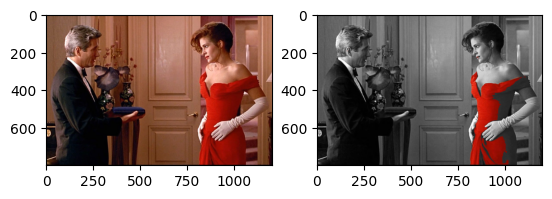

In [69]:
plt.subplot(1,2,1), plt.imshow(vestido)
plt.subplot(1,2,2), plt.imshow(vestido_seg)
plt.show()